In [1]:
# Pick a classification dataset from the LIBSVM repository:
# Partition the dataset into a training set and a validation set. Run a
# decision tree algorithm on the training set to generate a decision tree.
# Validate the decision tree on the validation dataset and report the total
# classification error (i.e. 0/1 error). Repeat the experiment with a different
# partition of training set/validation set. Plot the resulting tree. Are the
# resulting decision trees very different? Explain why.
# Advice: it can be convenient to set a maximum depth for the tree.

In [2]:
import numpy as np
import pandas as pd
import pydotplus
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_svmlight_file
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [3]:
#load the file directly from URL - have to finish this!
with urllib.request.urlopen('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes') as response:
   text = response.read()
#print(text)

In [4]:
#load the file and read the labels in Y and data in X
X, Y = load_svmlight_file('/Users/aideenf/Desktop/Datasets/diabetes_scale.svm')
#X, Y = load_svmlight_file('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes')

In [5]:
#Split the data twice so we can run two tests, each on different data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X, Y, test_size = 0.8, random_state = 100)

72.07792207792207


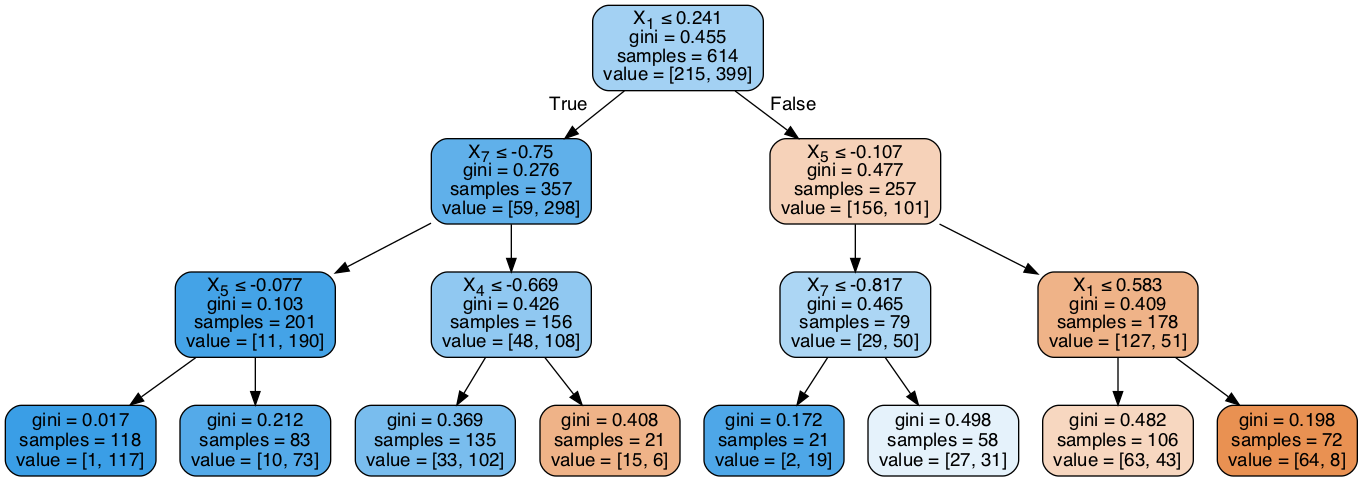

In [6]:
#Use a decision tree with gini on the two different training data sets, first here with X_Train and Y_train
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=10)
clf_gini.fit(X_train, Y_train)
Y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(Y_test,Y_pred_gini)*100
print(accuracy_gini)
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

70.08130081300813


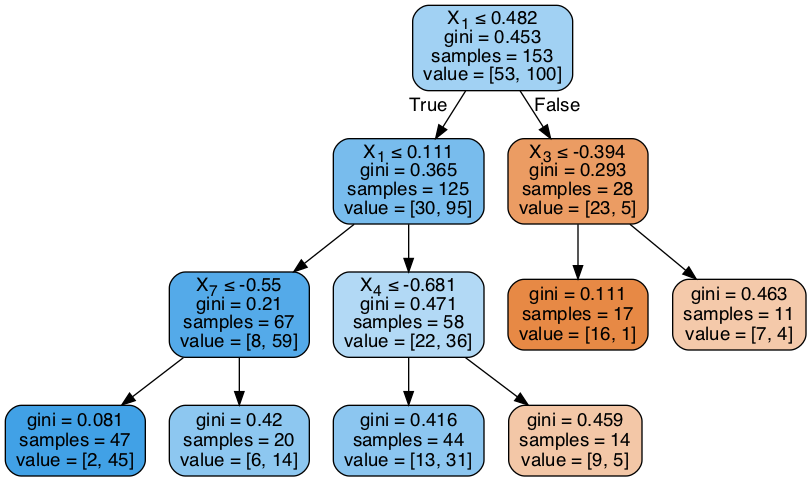

In [8]:
#Now run on the second train/test split
clf_gini.fit(X_trainB, Y_trainB)
Y_pred_giniB = clf_gini.predict(X_testB)
accuracy_giniB = accuracy_score(Y_testB,Y_pred_giniB)*100
print(accuracy_giniB)
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=7, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)
Y_pred_en = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(Y_test,Y_pred_en)*100
print(accuracy_entropy)
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clf_entropy.fit(X_trainB, Y_trainB)
Y_pred_enB = clf_entropy.predict(X_testB)
accuracy_entropyB = accuracy_score(Y_testB,Y_pred_enB)*100
print(accuracy_entropyB)
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Are the resulting decision trees very different? Explain why.

In [ ]:
#Note:  Entropy is a measure of the disorder/impurity of the samples in the dataset, 
#the higher the value of the entropy the higher the disorder. the objectibe of the decision
#tree is t Information gain (IG) measures how much “information” a feature gives us about the class.
#https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01
#https://github.com/Jam3/math-as-code